# Vehicle Collision Dataset Analysis: Seattle Department of Transportation (SDOT)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [3]:
df = pd.read_csv("Collisions.csv", low_memory=False, parse_dates=["INCDATE"])
df_original = df.copy()
df.head()

X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO     STATUS  \
0 -122.392900  47.648646  1         332176  333676     EA40602  Matched     
1 -122.284487  47.603308  2         328504  330004     EA10294  Unmatched   
2 -122.338480  47.619119  3         329091  330591     EA15604  Matched     
3 -122.358307  47.653110  4         328274  329774     EA07215  Matched     
4 -122.296519  47.733786  5         329003  330503     E986969  Matched     

       ADDRTYPE   INTKEY  \
0  Intersection  26581.0   
1  Block        NaN        
2  Block        NaN        
3  Block        NaN        
4  Intersection  35990.0   

                                                   LOCATION EXCEPTRSNCODE  \
0  28TH AVE W AND W DRAVUS ST                                               
1  LAKE WASHINGTON BLVD BETWEEN LAKESIDE AVE AND E ALDER ST  NEI            
2  WESTLAKE AVE N BETWEEN DENNY WAY AND JOHN ST                             
3  NW 36TH ST BETWEEN 1ST AVE NW AND LEARY WAY NW                           
4  30TH AVE NE AND NE 145TH ST                                              

                                                  EXCEPTRSNDESC SEVERITYCODE  \
0  NaN                                                           2             
1  Not Enough Information, or Insufficient Location Information  0             
2  NaN                                                           1             
3  NaN                                                           1             
4  NaN                                                           2             

                     SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  \
0  Injury Collision                Rear Ended    2            0          
1  Unknown                         NaN           0            0          
2  Property Damage Only Collision  Sideswipe     2            0          
3  Property Damage Only Collision  Parked Car    4            0          
4  Injury Collision                Angles        2            0          

   PEDCYLCOUNT  VEHCOUNT  INJURIES  SERIOUSINJURIES  FATALITIES  \
0  0            2         1         0                0            
1  0            0         0         0                0            
2  0            2         0         0                0            
3  0            4         0         0                0            
4  0            2         1         0                0            

                    INCDATE                INCDTTM  \
0 2020-06-09 00:00:00+00:00  6/9/2020 12:48:00 PM    
1 2020-02-02 00:00:00+00:00  2/2/2020                
2 2020-02-12 00:00:00+00:00  2/12/2020 8:00:00 AM    
3 2020-01-23 00:00:00+00:00  1/23/2020 10:33:00 PM   
4 2019-11-26 00:00:00+00:00  11/26/2019 8:26:00 AM   

                              JUNCTIONTYPE  SDOT_COLCODE  \
0  At Intersection (intersection related)   14.0           
1  NaN                                      0.0            
2  Mid-Block (not related to intersection)  14.0           
3  Mid-Block (not related to intersection)  14.0           
4  At Intersection (intersection related)   11.0           

                                             SDOT_COLDESC INATTENTIONIND  \
0  MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END            NaN             
1  NOT ENOUGH INFORMATION / NOT APPLICABLE                 NaN             
2  MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END            NaN             
3  MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END            NaN             
4  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE  Y               

  UNDERINFL   WEATHER ROADCOND                LIGHTCOND PEDROWNOTGRNT  \
0  N         Overcast  Dry      Daylight                 NaN            
1  NaN       NaN       NaN      NaN                      NaN            
2  N         Clear     Dry      Daylight                 NaN            
3  N         Raining   Wet      Dark - Street Lights On  NaN            
4  N         Clear     Dry      Daylight                 NaN            

   SDO

For the data description visit https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

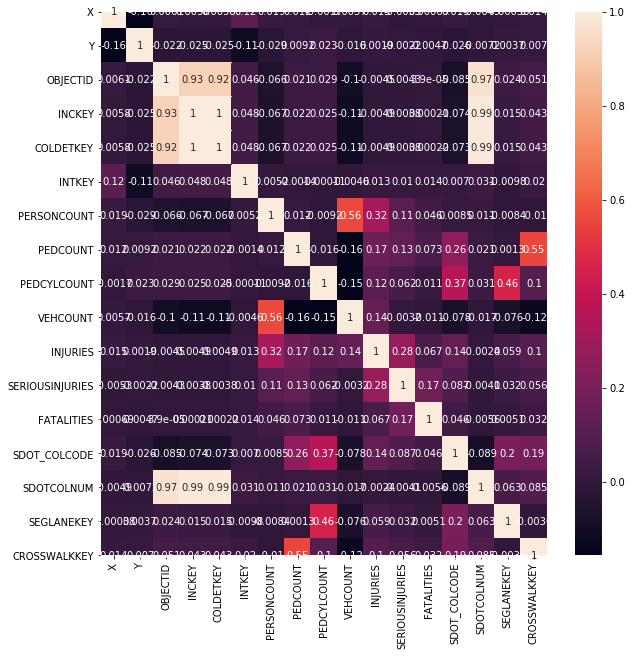

In [4]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

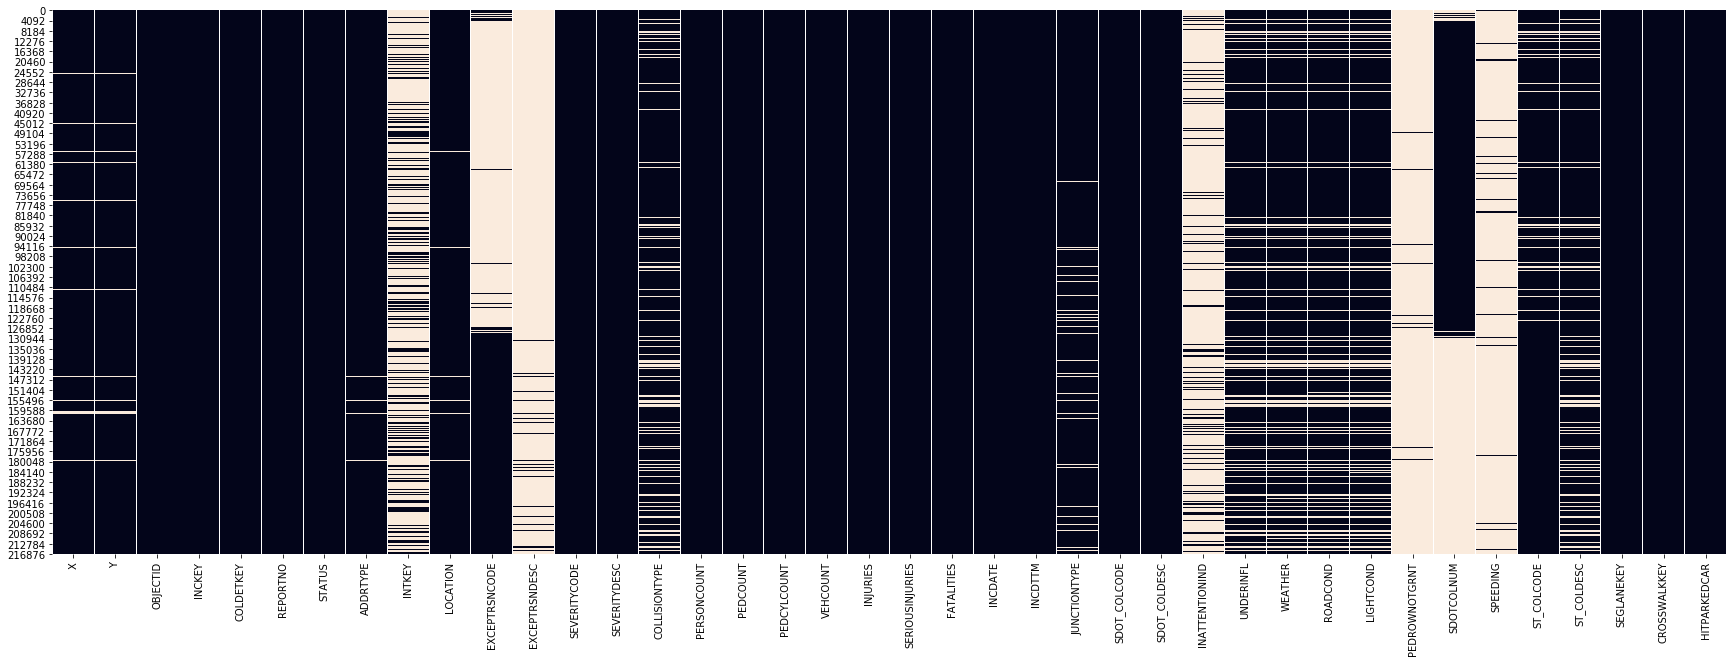

In [5]:
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(df.isnull(), cbar=False, ax=ax)

In [4]:
df.drop(["EXCEPTRSNDESC","EXCEPTRSNCODE","REPORTNO"],axis=1,inplace=True)

In [5]:
df.isnull().sum()

X               7466 
Y               7466 
OBJECTID        0    
INCKEY          0    
COLDETKEY       0    
               ..    
ST_COLCODE      9413 
ST_COLDESC      26271
SEGLANEKEY      0    
CROSSWALKKEY    0    
HITPARKEDCAR    0    
Length: 37, dtype: int64

In [148]:
df['INJURIES'].groupby(df['SEVERITYCODE']).mean()

SEVERITYCODE
0     0.000000
1     0.000000
2     0.000000
2b    1.051133
3     0.295129
Name: SERIOUSINJURIES, dtype: float64

In [ ]:
df['INJURIES'].groupby(df['SEVERITYCODE']).agg(lambda x:x.value_counts().index[0])

# Classification Model for SEVERITY

## DATA CLEANING

In [101]:
data = df.copy()
data = data[(data["SEVERITYCODE"]=='1')|(data["SEVERITYCODE"]=='2')]
data.dropna(subset = ["SEVERITYCODE"], inplace=True)
y = data["SEVERITYCODE"]
data.drop(["SEVERITYDESC","SDOT_COLDESC","OBJECTID","INCKEY","COLDETKEY","ST_COLDESC","SDOT_COLDESC","SEVERITYCODE","LOCATION","INTKEY","INCDATE","SDOTCOLNUM"],axis=1,inplace=True)
data["X"] = data["X"].astype("float")
data["Y"] = data["Y"].astype("float")

In [102]:
data

X          Y   STATUS      ADDRTYPE COLLISIONTYPE  \
0      -122.392900  47.648646  Matched  Intersection  Rear Ended     
2      -122.338480  47.619119  Matched  Block         Sideswipe      
3      -122.358307  47.653110  Matched  Block         Parked Car     
4      -122.296519  47.733786  Matched  Intersection  Angles         
5      -122.353952  47.689837  Matched  Block         Rear Ended     
...            ...        ...      ...    ...                ...     
220929 -122.341890  47.607340  Matched  Block         Right Turn     
220931 -122.344940  47.626272  Matched  Intersection  Angles         
220932 -122.344834  47.713548  Matched  Block         Sideswipe      
220934 -122.320347  47.603521  Matched  Block         Parked Car     
220935 -122.315664  47.676198  Matched  Block         Parked Car     

        PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
0       2            0         0            2         1          
2       2            0         0            2         0          
3       4            0         0            4         0          
4       2            0         0            2         1          
5       3            0         0            2         0          
...    ..           ..        ..           ..        ..          
220929  2            0         0            2         0          
220931  2            0         0            2         2          
220932  2            0         0            2         0          
220934  2            0         0            2         0          
220935  2            0         0            2         1          

        SERIOUSINJURIES  FATALITIES                INCDTTM  \
0       0                0           6/9/2020 12:48:00 PM    
2       0                0           2/12/2020 8:00:00 AM    
3       0                0           1/23/2020 10:33:00 PM   
4       0                0           11/26/2019 8:26:00 AM   
5       0                0           3/25/2013 6:46:00 PM    
...    ..               ..                            ...    
220929  0                0           1/24/2020 7:29:00 PM    
220931  0                0           3/2/2020 2:36:00 PM     
220932  0                0           4/1/2020 12:57:00 PM    
220934  0                0           1/28/2020 6:30:00 PM    
220935  0                0           6/11/2020 4:05:00 PM    

                                   JUNCTIONTYPE  SDOT_COLCODE INATTENTIONIND  \
0       At Intersection (intersection related)   14.0          NaN             
2       Mid-Block (not related to intersection)  14.0          NaN             
3       Mid-Block (not related to intersection)  14.0          NaN             
4       At Intersection (intersection related)   11.0          Y               
5       Mid-Block (not related to intersection)  14.0          NaN             
...                                         ...   ...          ...             
220929  Mid-Block (not related to intersection)  11.0          NaN             
220931  At Intersection (intersection related)   11.0          NaN             
220932  Driveway Junction                        11.0          NaN             
220934  Driveway Junction                        14.0          NaN             
220935  Mid-Block (not related to intersection)  11.0          NaN             

       UNDERINFL   WEATHER ROADCOND                LIGHTCOND PEDROWNOTGRNT  \
0       N         Overcast  Dry      Daylight                 NaN            
2       N         Clear     Dry      Daylight                 NaN            
3       N         Raining   Wet      Dark - Street Lights On  NaN            
4       N         Clear     Dry      Daylight                 NaN            
5       Y         Clear     Dry      Daylight                 NaN            
...    ..           ...     ...           ...                 ...            
220929  N         Raining   Wet      Dark - Street Lights On  NaN            
220931  N         Raining   Wet      Daylight        

In [103]:
y.value_counts(normalize=True)

1    0.700838
2    0.299162
Name: SEVERITYCODE, dtype: float64

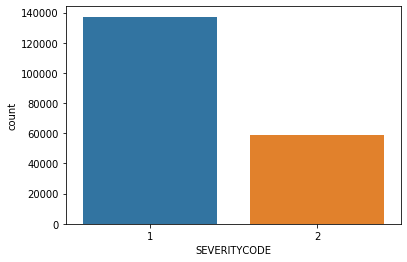

In [104]:
sns.countplot(y)

## Tree based classification

#### Preprocessing

In [105]:
def for_UNDERINFL(x):
    if x in ['Y','1']:
        return 1
    elif x in ['N','0']:
        return 0
    else:
        return x
    
data["UNDERINFL"] = data["UNDERINFL"].apply(for_UNDERINFL)

data["WEATHER"] = data["WEATHER"].apply(lambda x: "Unknown_WEATHER" if x in ["Unknown",np.nan] else x)
data["INATTENTIONIND"] = data["INATTENTIONIND"].apply(lambda x: 1 if x=="Y" else 0)
data["COLLISIONTYPE"].fillna("Unknown_COLLISIONTYPE", inplace=True)
data["JUNCTIONTYPE"].fillna("Unknown_JUNCTIONTYPE", inplace=True)
data['STATUS'] = df['STATUS'].apply(lambda x: 1 if x=="Matched" else 0)
data["INATTENTIONIND"] = data["INATTENTIONIND"].apply(lambda x: 1 if x=="Y" else 0)
data["ROADCOND"] = data["ROADCOND"].apply(lambda x: "Unknown_ROADCOND" if x in ["Unknown",np.nan] else x)
data["LIGHTCOND"] = data["LIGHTCOND"].apply(lambda x: "Unknown_LIGHTCOND" if x in ["Unknown",np.nan] else x)
data["PEDROWNOTGRNT"] = data["PEDROWNOTGRNT"].apply(lambda x: 1 if x=="Y" else 0)
data["SPEEDING"] = data["SPEEDING"].apply(lambda x: 1 if x=="Y" else 0)
data["HITPARKEDCAR"] = data["HITPARKEDCAR"].apply(lambda x: 1 if x=="Y" else 0)


data = pd.merge(data, pd.get_dummies(data["COLLISIONTYPE"], drop_first=True), right_index=True, left_index=True)
data = pd.merge(data, pd.get_dummies(data["ADDRTYPE"], drop_first=True), right_index=True, left_index=True)
data = pd.merge(data, pd.get_dummies(data["JUNCTIONTYPE"], drop_first=True), right_index=True, left_index=True)
data = pd.merge(data, pd.get_dummies(data["WEATHER"], drop_first=True), right_index=True, left_index=True)
data = pd.merge(data, pd.get_dummies(data["ROADCOND"], drop_first=True), right_index=True, left_index=True)
data = pd.merge(data, pd.get_dummies(data["LIGHTCOND"], drop_first=True), right_index=True, left_index=True)

data.drop(["ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND"], axis=1, inplace=True)

In [106]:
#TEMP DROP
data.drop(["INCDTTM", "X", "Y", "FATALITIES", "INJURIES", "SERIOUSINJURIES"], axis=1, inplace=True)

In [149]:
data.dropna(inplace=True)
data

X          Y  STATUS  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  \
0      -122.392900  47.648646  1       2            0         0             
2      -122.338480  47.619119  1       2            0         0             
3      -122.358307  47.653110  1       4            0         0             
4      -122.296519  47.733786  1       2            0         0             
5      -122.353952  47.689837  1       3            0         0             
...            ...        ... ..      ..           ..        ..             
220929 -122.341890  47.607340  1       2            0         0             
220931 -122.344940  47.626272  1       2            0         0             
220932 -122.344834  47.713548  1       2            0         0             
220934 -122.320347  47.603521  1       2            0         0             
220935 -122.315664  47.676198  1       2            0         0             

        VEHCOUNT  INJURIES  SERIOUSINJURIES  FATALITIES  INATTENTIONIND  \
0       2         1         0                0           0                
2       2         0         0                0           0                
3       4         0         0                0           0                
4       2         1         0                0           0                
5       2         0         0                0           0                
...    ..        ..        ..               ..          ..                
220929  2         0         0                0           0                
220931  2         2         0                0           0                
220932  2         0         0                0           0                
220934  2         0         0                0           0                
220935  2         1         0                0           0                

        UNDERINFL  PEDROWNOTGRNT  SPEEDING  SEGLANEKEY  CROSSWALKKEY  \
0       0.0        0              0         0           0              
2       0.0        0              0         0           0              
3       0.0        0              0         0           0              
4       0.0        0              0         0           0              
5       1.0        0              0         0           0              
...     ...       ..             ..        ..          ..              
220929  0.0        0              0         0           0              
220931  0.0        0              0         0           0              
220932  0.0        0              0         0           0              
220934  0.0        0              0         0           0              
220935  0.0        0              0         0           0              

        HITPARKEDCAR  Cycles  Head On  Left Turn  Other_x  Parked Car  \
0       0             0       0        0          0        0            
2       0             0       0        0          0        0            
3       1             0       0        0          0        1            
4       0             0       0        0          0        0            
5       0             0       0        0          0        0            
...    ..            ..      ..       ..         ..       ..            
220929  0             0       0        0          0        0            
220931  0             0       0        0          0        0            
220932  0             0       0        0          0        0            
220934  1             0       0        0          0        1            
220935  0             0       0        0          0        1            

        Pedestrian  Rear Ended  Right Turn  Sideswipe  Unknown_COLLISIONTYPE  \
0       0           1           0           0          0                       
2       0           0           0           1          0                       
3       0           0           0           0          0                       
4       0           0           0           0          0                       
5       0           1           0           0    

In [108]:
ST_COLCODE = data["ST_COLCODE"].factorize()
data["ST_COLCODE"] = ST_COLCODE[0]
SDOT_COLCODE = data["SDOT_COLCODE"].factorize()
data["SDOT_COLCODE"] = SDOT_COLCODE[0]

In [109]:
#data["X"] = data["X"].fillna(99)
#data["Y"] = data["Y"].fillna(99)
data["UNDERINFL"] = data["UNDERINFL"].fillna(99)

In [110]:
y.unique()

array(['2', '1'], dtype=object)

In [111]:
pd.DataFrame(data.isna().any()).transpose()

STATUS  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  SDOT_COLCODE  \
0  False   False        False     False        False     False          

   INATTENTIONIND  UNDERINFL  PEDROWNOTGRNT  SPEEDING  ST_COLCODE  SEGLANEKEY  \
0  False           False      False          False     False       False        

   CROSSWALKKEY  HITPARKEDCAR  Cycles  Head On  Left Turn  Other_x  \
0  False         False         False   False    False      False     

   Parked Car  Pedestrian  Rear Ended  Right Turn  Sideswipe  \
0  False       False       False       False       False       

   Unknown_COLLISIONTYPE  Block  Intersection  \
0  False                  False  False          

   At Intersection (intersection related)  Driveway Junction  \
0  False                                   False               

   Mid-Block (but intersection related)  \
0  False                                  

   Mid-Block (not related to intersection)  Ramp Junction  Unknown  \
0  False                                    False          False     

   Unknown_JUNCTIONTYPE  Clear  Fog/Smog/Smoke  Other_y  Overcast  \
0  False                 False  False           False    False      

   Partly Cloudy  Raining  Severe Crosswind  Sleet/Hail/Freezing Rain  \
0  False          False    False             False                      

   Snowing  Unknown_WEATHER    Ice    Oil  Other_x  Sand/Mud/Dirt  Snow/Slush  \
0  False    False            False  False  False    False          False        

   Standing Water  Unknown_ROADCOND    Wet  Dark - Street Lights Off  \
0  False           False             False  False                      

   Dark - Street Lights On  Dark - Unknown Lighting   Dawn  Daylight   Dusk  \
0  False                    False                    False  False     False   

   Other_y  Unknown_LIGHTCOND  
0  False    False

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [113]:
col_names = data.columns
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [114]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [115]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7432280677873817


In [116]:
# from sklearn.tree import plot_tree
# plot_tree(clf)

[Text(279.8764536369634, 215.12680851063828, 'X[18] <= 0.5\ngini = 0.419\nsamples = 137132\nvalue = [96121, 41011]'),
 Text(246.55814670257666, 210.50042553191489, 'X[2] <= 0.5\ngini = 0.471\nsamples = 103187\nvalue = [64055, 39132]'),
 Text(217.35339390611648, 205.8740425531915, 'X[3] <= 0.5\ngini = 0.457\nsamples = 98333\nvalue = [63570, 34763]'),
 Text(174.5866602241499, 201.2476595744681, 'X[22] <= 0.5\ngini = 0.444\nsamples = 94483\nvalue = [63063, 31420]'),
 Text(111.16896756460888, 196.6212765957447, 'X[1] <= 2.5\ngini = 0.463\nsamples = 81367\nvalue = [51721, 29646]'),
 Text(52.58529494646475, 191.99489361702126, 'X[10] <= 3.5\ngini = 0.421\nsamples = 50514\nvalue = [35302, 15212]'),
 Text(20.73222883301514, 187.36851063829786, 'X[49] <= 0.5\ngini = 0.453\nsamples = 23398\nvalue = [15274, 8124]'),
 Text(18.781467721128916, 182.74212765957446, 'X[27] <= 0.5\ngini = 0.456\nsamples = 22652\nvalue = [14675, 7977]'),
 Text(16.72548374039661, 178.11574468085107, 'X[4] <= 2.5\ngini = 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001E4656350D8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E46563F708> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# tree.plot_tree(clf, filled = True);
# fig.savefig('imagename.png')

In [ ]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')
from sklearn.externals.six import StringIO
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf") 

## Logistic Regression

In [32]:
data = df.copy()
data = data[(data["SEVERITYCODE"]=='1')|(data["SEVERITYCODE"]=='2')]
#data.dropna(subset = ["SEVERITYCODE"], inplace=True)
data.drop(["SEVERITYDESC","SDOT_COLDESC","OBJECTID","INCKEY","COLDETKEY","ST_COLDESC","SDOT_COLDESC","LOCATION","INTKEY","INCDATE","SDOTCOLNUM"],axis=1,inplace=True)
data["X"] = data["X"].astype("float")
data["Y"] = data["Y"].astype("float")

In [33]:
def for_UNDERINFL(x):
    if x in ['Y','1']:
        return 1
    elif x in ['N','0']:
        return 0
    else:
        return x
    
data["UNDERINFL"] = data["UNDERINFL"].apply(for_UNDERINFL)

data["WEATHER"] = data["WEATHER"].apply(lambda x: "Unknown_WEATHER" if x in ["Unknown",np.nan] else x)
data["INATTENTIONIND"] = data["INATTENTIONIND"].apply(lambda x: 1 if x=="Y" else 0)
data["COLLISIONTYPE"].fillna("Unknown_COLLISIONTYPE", inplace=True)
data["JUNCTIONTYPE"].fillna("Unknown_JUNCTIONTYPE", inplace=True)
data['STATUS'] = df['STATUS'].apply(lambda x: 1 if x=="Matched" else 0)
data["INATTENTIONIND"] = data["INATTENTIONIND"].apply(lambda x: 1 if x=="Y" else 0)
data["ROADCOND"] = data["ROADCOND"].apply(lambda x: "Unknown_ROADCOND" if x in ["Unknown",np.nan] else x)
data["LIGHTCOND"] = data["LIGHTCOND"].apply(lambda x: "Unknown_LIGHTCOND" if x in ["Unknown",np.nan] else x)
data["PEDROWNOTGRNT"] = data["PEDROWNOTGRNT"].apply(lambda x: 1 if x=="Y" else 0)
data["SPEEDING"] = data["SPEEDING"].apply(lambda x: 1 if x=="Y" else 0)
data["HITPARKEDCAR"] = data["HITPARKEDCAR"].apply(lambda x: 1 if x=="Y" else 0)


data = pd.merge(data, pd.get_dummies(data["COLLISIONTYPE"], drop_first=True), right_index=True, left_index=True)
data = pd.merge(data, pd.get_dummies(data["ADDRTYPE"], drop_first=True), right_index=True, left_index=True)
data = pd.merge(data, pd.get_dummies(data["JUNCTIONTYPE"], drop_first=True), right_index=True, left_index=True)
data = pd.merge(data, pd.get_dummies(data["WEATHER"], drop_first=True), right_index=True, left_index=True)
data = pd.merge(data, pd.get_dummies(data["ROADCOND"], drop_first=True), right_index=True, left_index=True)
data = pd.merge(data, pd.get_dummies(data["LIGHTCOND"], drop_first=True), right_index=True, left_index=True)

data.drop(["ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND"], axis=1, inplace=True)

In [34]:
data.drop(["SDOT_COLCODE","INCDTTM","ST_COLCODE"], axis=1, inplace=True)

In [30]:
# data[(data["SDOT_COLCODE"]<70)&(data["SDOT_COLCODE"]>=10)]["ISMOTORVEHICLE"] = 1
# data[(data["SDOT_COLCODE"]<70)&(data["SDOT_COLCODE"]>=10)]["ISMOTORVEHICLE"] = 1
# data[(data["SDOT_COLCODE"]<70)&(data["SDOT_COLCODE"]>=10)]["ISMOTORVEHICLE"] = 1

In [35]:
data.columns

Index(['X', 'Y', 'STATUS', 'SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'Cycles', 'Head On',
       'Left Turn', 'Other_x', 'Parked Car', 'Pedestrian', 'Rear Ended',
       'Right Turn', 'Sideswipe', 'Unknown_COLLISIONTYPE', 'Block',
       'Intersection', 'At Intersection (intersection related)',
       'Driveway Junction', 'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction', 'Unknown',
       'Unknown_JUNCTIONTYPE', 'Clear', 'Fog/Smog/Smoke', 'Other_y',
       'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Unknown_WEATHER', 'Ice', 'Oil',
       'Other_x', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water',
       'Unknown_ROADCOND', 'Wet', 'Dark - Street Lights Off',
       'Dark -

In [36]:
data.dropna(inplace=True, axis=0)
y = data["SEVERITYCODE"]
data.drop(["SEVERITYCODE"],axis=1,inplace=True)
data.drop(["X", "Y", "FATALITIES", "INJURIES", "SERIOUSINJURIES"], axis=1, inplace=True)

In [37]:
data

STATUS  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INATTENTIONIND  \
0       1       2            0         0            2         0                
2       1       2            0         0            2         0                
3       1       4            0         0            4         0                
4       1       2            0         0            2         0                
5       1       3            0         0            2         0                
...    ..      ..           ..        ..           ..        ..                
220929  1       2            0         0            2         0                
220931  1       2            0         0            2         0                
220932  1       2            0         0            2         0                
220934  1       2            0         0            2         0                
220935  1       2            0         0            2         0                

        UNDERINFL  PEDROWNOTGRNT  SPEEDING  SEGLANEKEY  CROSSWALKKEY  \
0       0.0        0              0         0           0              
2       0.0        0              0         0           0              
3       0.0        0              0         0           0              
4       0.0        0              0         0           0              
5       1.0        0              0         0           0              
...     ...       ..             ..        ..          ..              
220929  0.0        0              0         0           0              
220931  0.0        0              0         0           0              
220932  0.0        0              0         0           0              
220934  0.0        0              0         0           0              
220935  0.0        0              0         0           0              

        HITPARKEDCAR  Cycles  Head On  Left Turn  Other_x  Parked Car  \
0       0             0       0        0          0        0            
2       0             0       0        0          0        0            
3       1             0       0        0          0        1            
4       0             0       0        0          0        0            
5       0             0       0        0          0        0            
...    ..            ..      ..       ..         ..       ..            
220929  0             0       0        0          0        0            
220931  0             0       0        0          0        0            
220932  0             0       0        0          0        0            
220934  1             0       0        0          0        1            
220935  0             0       0        0          0        1            

        Pedestrian  Rear Ended  Right Turn  Sideswipe  Unknown_COLLISIONTYPE  \
0       0           1           0           0          0                       
2       0           0           0           1          0                       
3       0           0           0           0          0                       
4       0           0           0           0          0                       
5       0           1           0           0          0                       
...    ..          ..          ..          ..         ..                       
220929  0           0           1           0          0                       
220931  0           0           0           0          0                       
220932  0           0           0           1          0                       
220934  0           0           0           0          0                       
220935  0           0           0           0          0                       

        Block  Intersection  At Intersection (intersection related)  \
0       0      1             1                                        
2       1      0             0                                        
3       1      0             0                                        
4       0      1             1                              

In [38]:
pd.DataFrame(data.isna().any()).transpose()

STATUS  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INATTENTIONIND  \
0  False   False        False     False        False     False            

   UNDERINFL  PEDROWNOTGRNT  SPEEDING  SEGLANEKEY  CROSSWALKKEY  HITPARKEDCAR  \
0  False      False          False     False       False         False          

   Cycles  Head On  Left Turn  Other_x  Parked Car  Pedestrian  Rear Ended  \
0  False   False    False      False    False       False       False        

   Right Turn  Sideswipe  Unknown_COLLISIONTYPE  Block  Intersection  \
0  False       False      False                  False  False          

   At Intersection (intersection related)  Driveway Junction  \
0  False                                   False               

   Mid-Block (but intersection related)  \
0  False                                  

   Mid-Block (not related to intersection)  Ramp Junction  Unknown  \
0  False                                    False          False     

   Unknown_JUNCTIONTYPE  Clear  Fog/Smog/Smoke  Other_y  Overcast  \
0  False                 False  False           False    False      

   Partly Cloudy  Raining  Severe Crosswind  Sleet/Hail/Freezing Rain  \
0  False          False    False             False                      

   Snowing  Unknown_WEATHER    Ice    Oil  Other_x  Sand/Mud/Dirt  Snow/Slush  \
0  False    False            False  False  False    False          False        

   Standing Water  Unknown_ROADCOND    Wet  Dark - Street Lights Off  \
0  False           False             False  False                      

   Dark - Street Lights On  Dark - Unknown Lighting   Dawn  Daylight   Dusk  \
0  False                    False                    False  False     False   

   Other_y  Unknown_LIGHTCOND  
0  False    False

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.722363519128815


## FEATURE ENGINEERING
1. Time from date

In [ ]:
wo_time_index = []
for i,p in enumerate(data["INCDTTM"]):
    if ":" not in p:
        wo_time_index.append(i)

In [ ]:
def get_time(*x,y):
    print(x[y])
    return x

data.apply(get_time, axis=1, args=("INCDTTM"))